# Machine Learning Assignment 
# Customer Churn Prediction

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("C:/Users/ravik/Downloads/customer_churn_large_dataset.xlsx")

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  float64
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  float64
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  float64
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  float64
 8   Churn                       100000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.9+ MB


In [5]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [6]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

In [8]:
corelation = df.corr()

Text(0.5, 1.0, 'corelation between different variables')

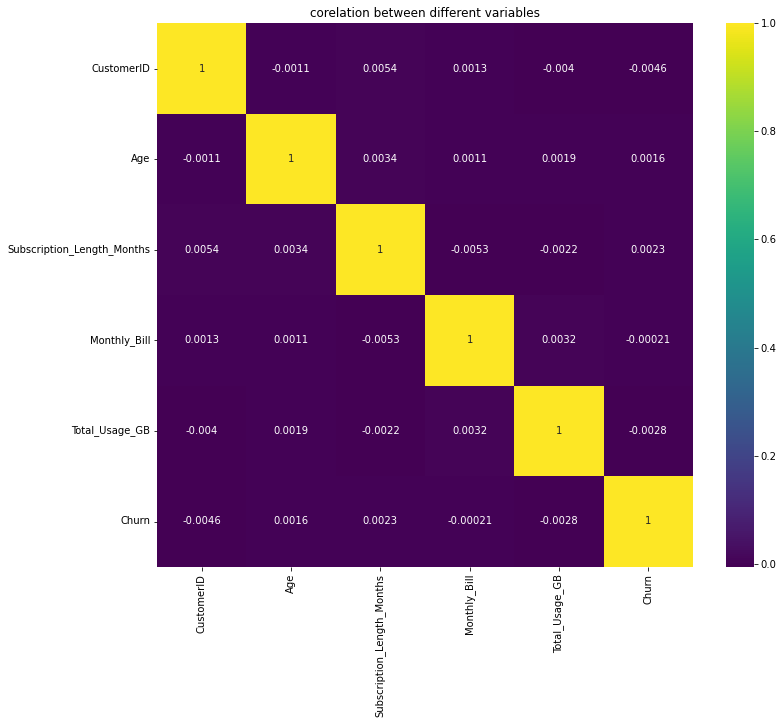

In [9]:
plt.figure(figsize = (12,10))
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True, cmap="viridis")
plt.title("corelation between different variables")

# Outlier Detection

<AxesSubplot:>

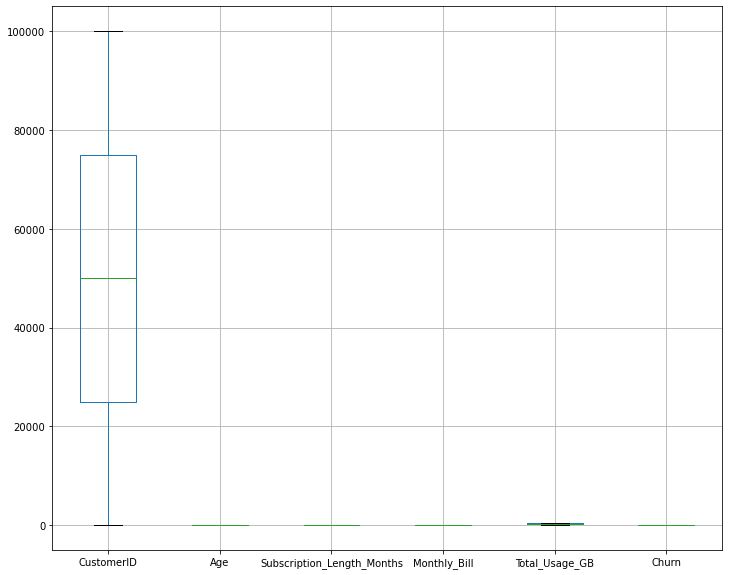

In [10]:
df.boxplot(figsize=(12,10))

<AxesSubplot:xlabel='CustomerID'>

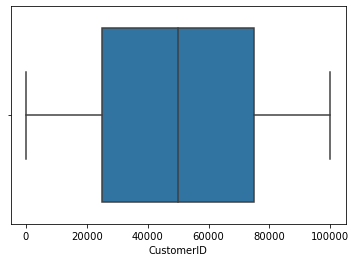

In [11]:
sns.boxplot(x='CustomerID', data=df, orient='h')

<AxesSubplot:xlabel='Age'>

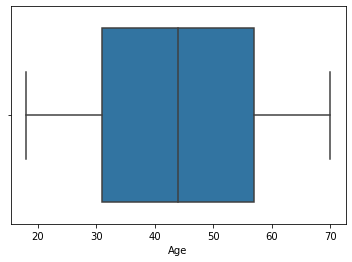

In [12]:
sns.boxplot(x='Age', data=df, orient='h')

<AxesSubplot:xlabel='Monthly_Bill'>

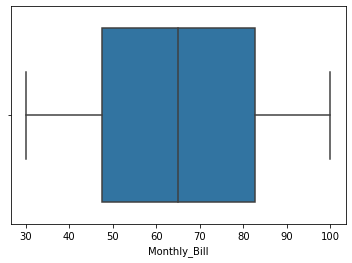

In [13]:
sns.boxplot(x='Monthly_Bill', data=df, orient='h')

<AxesSubplot:xlabel='Total_Usage_GB'>

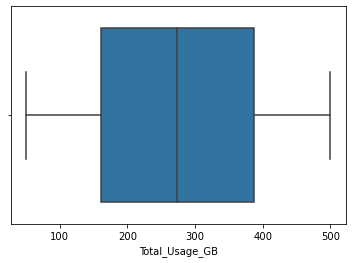

In [14]:
sns.boxplot(x='Total_Usage_GB', data=df, orient='h')

<AxesSubplot:xlabel='Subscription_Length_Months'>

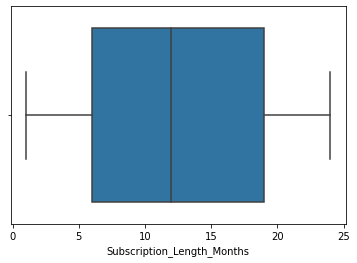

In [15]:
sns.boxplot(x='Subscription_Length_Months', data=df)

# Label Encoding

In [16]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
df["Location"].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [18]:
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [19]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder = LabelEncoder()

In [22]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Location'] = label_encoder.fit_transform(df['Location'])

In [23]:
df['Location'] = label_encoder.fit_transform(df['Location'])

In [24]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,1,2,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,0,4,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,0,2,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,0,3,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,0,3,19.0,58.14,266.0,0.0


In [25]:
df['Location'].unique()

array([2, 4, 3, 0, 1], dtype=int64)

In [26]:
df['Location'].value_counts()

1    20157
2    20041
3    20031
0    19958
4    19813
Name: Location, dtype: int64

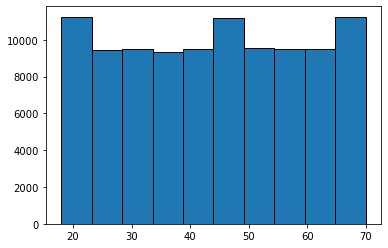

In [27]:
plt.hist(df['Age'], bins= 10, stacked=False, edgecolor= 'k')
plt.show()

In [30]:
df_copy = df.copy()

In [32]:
df_copy.drop(columns=['Name'], inplace=True)

In [33]:
df_copy.head()

,CustomerID,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,63.0,1,2,17.0,73.36,236.0,0.0
1,2.0,62.0,0,4,1.0,48.76,172.0,0.0
2,3.0,24.0,0,2,5.0,85.47,460.0,0.0
3,4.0,36.0,0,3,3.0,97.94,297.0,1.0
4,5.0,46.0,0,3,19.0,58.14,266.0,0.0


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x = df_copy.drop(columns=['Churn'])
y = df_copy.Churn

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=43)

# Random Forest Regression

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score

In [57]:
Rf_model = RandomForestClassifier()

In [58]:
Rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
y_pred = Rf_model.predict(x_test)

In [60]:
Rf_accuracy = accuracy_score(y_test, y_pred)
Rf_accuracy

0.49475

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [67]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [68]:
y_pred1 = logistic_model.predict(x_test)

In [69]:
logistic_accuracy = accuracy_score(y_test, y_pred1)
logistic_accuracy

0.50395